In [2]:
# Importing all libraries
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Lambda, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

In [3]:
# defining the corpus
corpus = [
    'I love listening bajrang baan special hanuman song',
    'I also love listening Hanuman Chalisa',
    'Today, I am going to watch Ramayan',
    'Ramayan is a great story which depicts the life of rama',
    'rama is seventh avatar of Greatest God lord vishnu'
]

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print(f"embedding done: {sequences}")

embedding done: [[1, 2, 3, 9, 10, 11, 4, 12], [1, 13, 2, 3, 4, 14], [15, 1, 16, 17, 18, 19, 5], [5, 6, 20, 21, 22, 23, 24, 25, 26, 7, 8], [8, 6, 27, 28, 7, 29, 30, 31, 32]]


In [17]:
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 21
window_size = 2
contexts = []
targets = []

for sequence in sequences:
  for i in range(window_size, len(sequence) - window_size):
    context = sequence[i - window_size:i]+ sequence[i+1:i+window_size+1]
    target = sequence[i]
    contexts.append(context)
    targets.append(target)

In [18]:
print(contexts)
print(targets)

[[1, 2, 9, 10], [2, 3, 10, 11], [3, 9, 11, 4], [9, 10, 4, 12], [1, 13, 3, 4], [13, 2, 4, 14], [15, 1, 17, 18], [1, 16, 18, 19], [16, 17, 19, 5], [5, 6, 21, 22], [6, 20, 22, 23], [20, 21, 23, 24], [21, 22, 24, 25], [22, 23, 25, 26], [23, 24, 26, 7], [24, 25, 7, 8], [8, 6, 28, 7], [6, 27, 7, 29], [27, 28, 29, 30], [28, 7, 30, 31], [7, 29, 31, 32]]
[3, 9, 10, 11, 2, 3, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 7, 29, 30]


In [13]:
X = np.array(contexts)
y = to_categorical(targets, num_classes=vocab_size)

In [16]:
print(X)
print(y)

[[ 1  2  9 10]
 [ 2  3 10 11]
 [ 3  9 11  4]
 [ 9 10  4 12]
 [ 1 13  3  4]
 [13  2  4 14]
 [15  1 17 18]
 [ 1 16 18 19]
 [16 17 19  5]
 [ 5  6 21 22]
 [ 6 20 22 23]
 [20 21 23 24]
 [21 22 24 25]
 [22 23 25 26]
 [23 24 26  7]
 [24 25  7  8]
 [ 8  6 28  7]
 [ 6 27  7 29]
 [27 28 29 30]
 [28  7 30 31]
 [ 7 29 31 32]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0

In [20]:
print(f'X shape: {X.shape}')
print(f'y shape:{y.shape}')

X shape: (21, 4)
y shape:(21, 33)


In [22]:
# creating the neural network
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length= 2*window_size))
model.add(Lambda(lambda x : tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs = 100, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0476 - loss: 3.4956
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0476 - loss: 3.4925
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0476 - loss: 3.4893
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0476 - loss: 3.4861
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0952 - loss: 3.4830
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0952 - loss: 3.4798
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.1429 - loss: 3.4766
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3333 - loss: 3.4735
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4286 - loss: 3.4703
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4762 - loss: 3.4671
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5238 - loss: 3.4639
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5238 - los

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

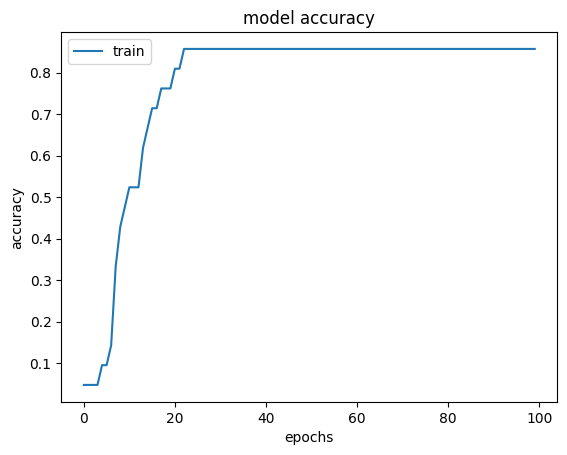

In [24]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

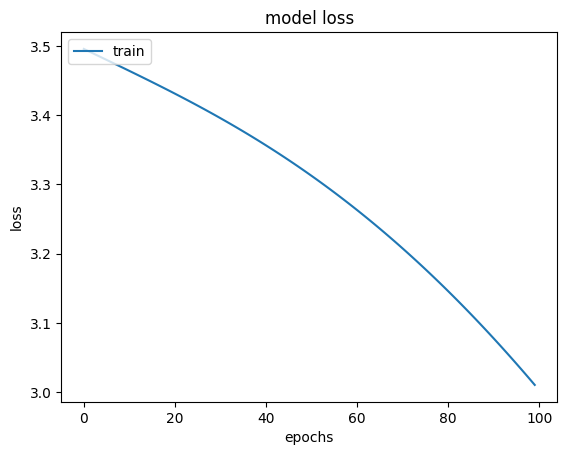

In [25]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train'], loc='upper left')
plt.show()